Итоговый проект
## КОСМИЧЕСКИЙ ТИТАНИК

#### Датасет

In [1]:
import pandas as pd

Отключение ограничений вывода количества строк и столбцов

In [2]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

С учётом неполноты таблицы test.csv (отсутствия столбца "Transported") развед. анализ данных будет проводиться только для train.csv

In [3]:
# const
data_patch = "data/Spaceship_Titanic/train.csv"

In [4]:
# data
df = pd.read_csv(data_patch)

#### Обзор датасета

Типы значений в столбцах

In [5]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Описательная статистика численных столбцов

In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Категориальные признаки

In [7]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [9]:
df["Cabin"].nunique()

6560

In [10]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [12]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Фактически значения колонок "CryoSleep" и "VIP" являются бинарными, хотя определены как категориальные

#### Пропуски

Количество пропусков по столбцам

In [13]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Доля пропусков по столбцам

In [14]:
df.isnull().sum() / df.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

Доля пропусков менее 3%, поэтому строки с пропусками можно удалить

In [15]:
df.shape

(8693, 14)

In [16]:
df = df.dropna()
df.shape

(6606, 14)

#### Корреляции

In [17]:
import seaborn as sns

Тепловая карта корреляций численных столбцов

<AxesSubplot:>

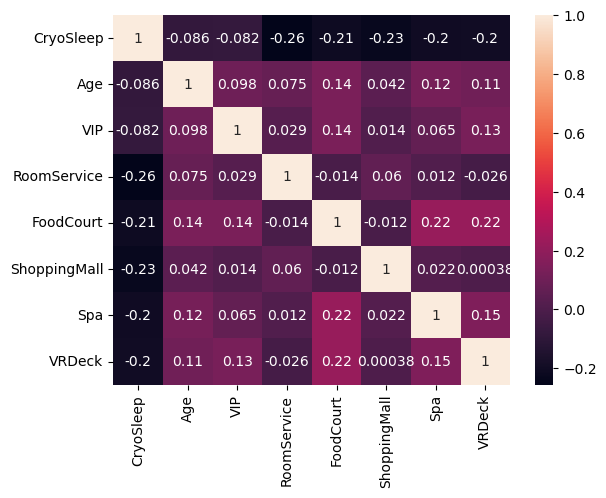

In [18]:
df = df.astype({"CryoSleep": 'bool', "VIP": 'bool'})  # бинаризация
sns.heatmap(
    df.loc[:, ["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].corr(),
    annot=True
)

#### Зависимость целевой переменной